In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Airbnb_Open_Data.csv to Airbnb_Open_Data.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Airbnb_Open_Data.csv"
df = pd.read_csv(file_path)
print(df.head())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

/tmp/ipython-input-162407088.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [9]:
# Convert 'last review' to datetime and handle errors
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Fill missing values
df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace=True)

# Drop records with missing 'name' or 'host name'
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [10]:
# Remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-138066982.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-138066982.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [13]:
print(df.describe())

                 id       host id            lat           long  \
count  1.014100e+05  1.014100e+05  101402.000000  101402.000000   
mean   2.920959e+07  4.926155e+10      40.728082     -73.949663   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.507574e+07  2.459183e+10      40.688730     -73.982570   
50%    2.922911e+07  4.912069e+10      40.722300     -73.954440   
75%    4.328308e+07  7.399747e+10      40.762750     -73.932340   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.626820e+07  2.853703e+10       0.055850       0.049474   

       Construction year          price    service fee  minimum nights  \
count      101210.000000  101171.000000  101142.000000   101016.000000   
mean         2012.486908     625.381008     125.043998        8.113744   
min          2003.000000      50.000000      10.000000    -1223.000000   
25%          2007.000000     340.000000      68.000000        2.000000   
50%          2012.000000  

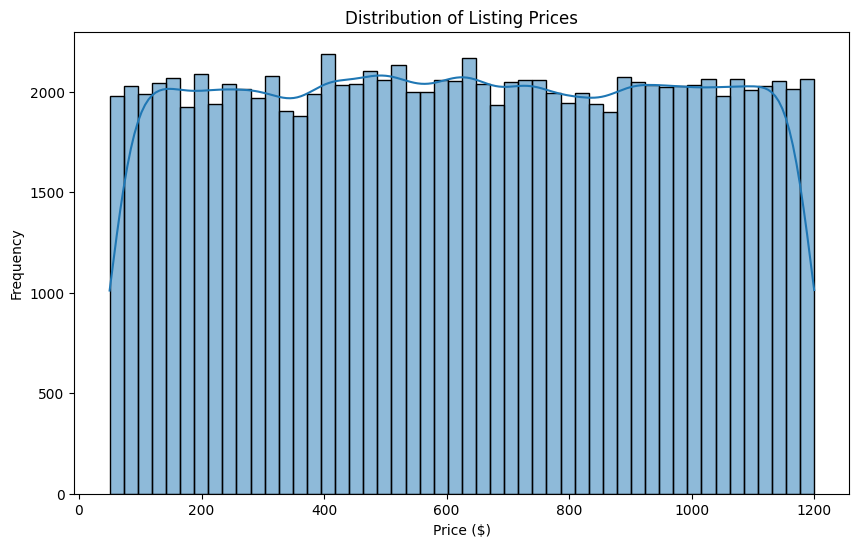

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

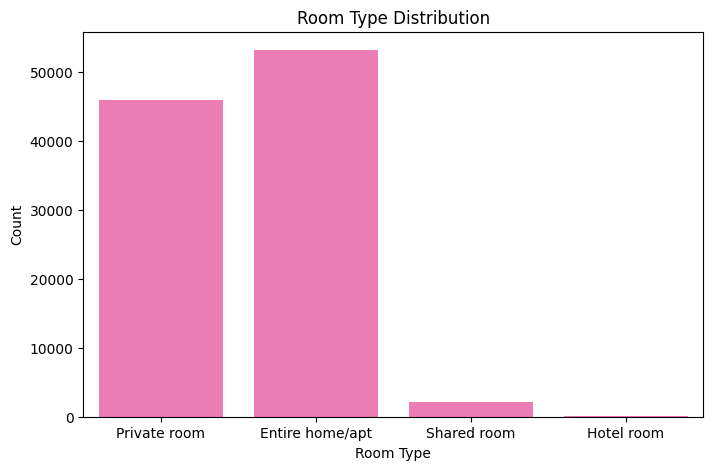

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df , color='hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

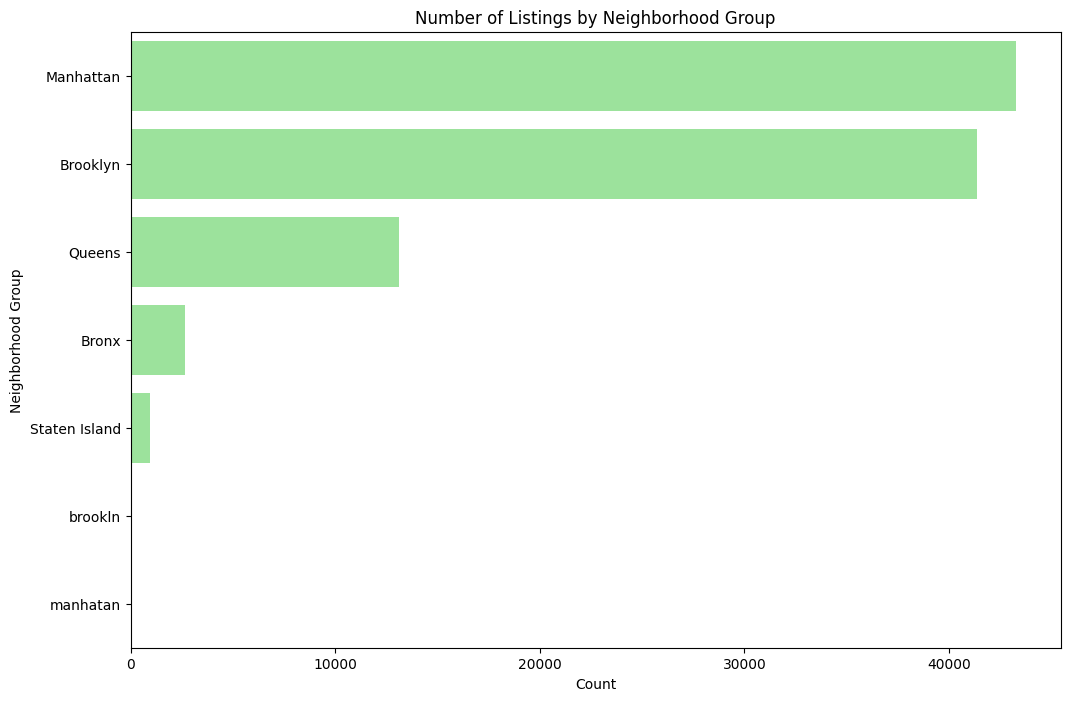

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood group', data=df,color="lightgreen" , order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

/tmp/ipython-input-3352285238.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


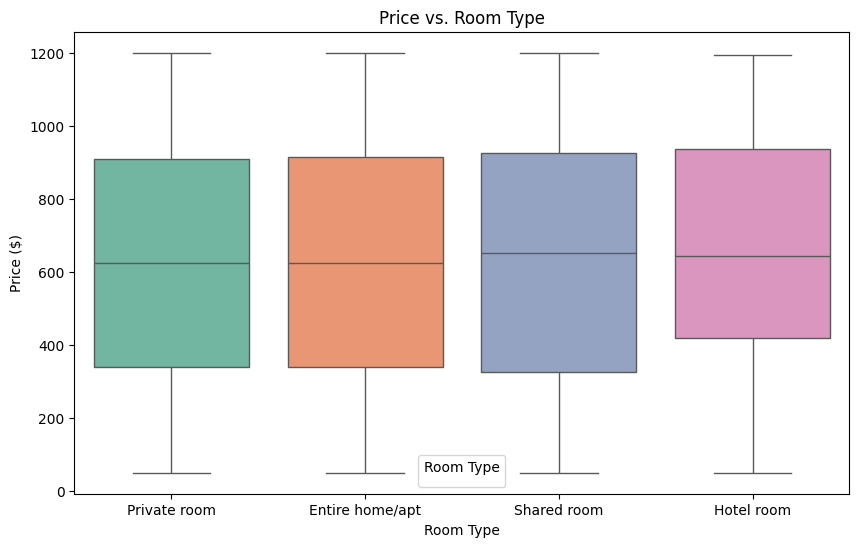

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set2')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.show()

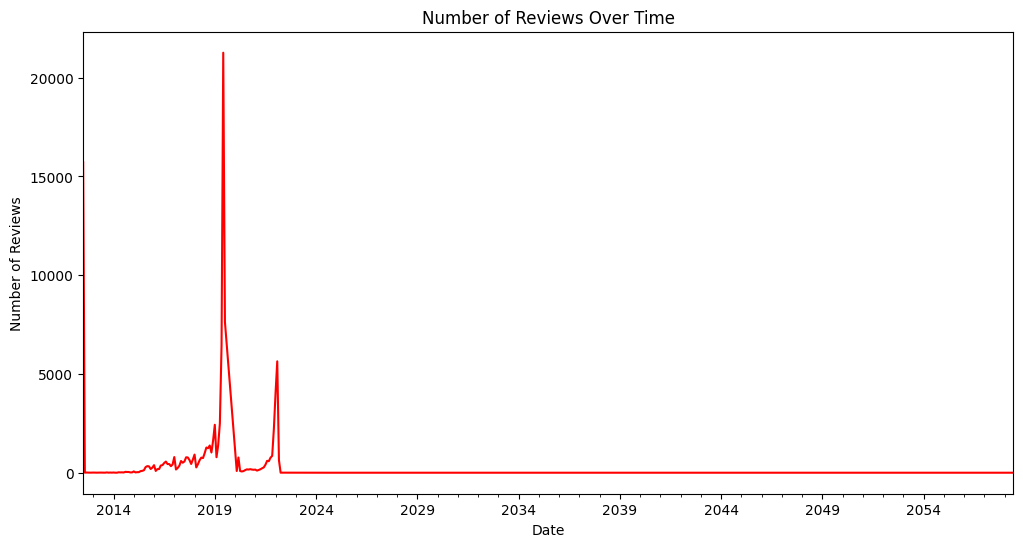

In [18]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()